<a href="https://colab.research.google.com/github/sumedhbhagat2732/Parkinson-Disease-Classification/blob/main/Parkinson's_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson's Disease (PD) classification


### Data Set Information:

The data used in this study was gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

Attribute Information:

Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

### Importing the necessary libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel


warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


### Understanding the data

In [103]:
df = pd.read_csv('pd_speech_features.csv')

In [104]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,...,0.071728,0.010352,-2.73030,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,...,0.729330,0.780410,5.22940,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,...,0.269510,-0.005522,0.35054,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,...,0.366920,-0.492650,0.19164,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.3

In [105]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.00000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,0.000605,0.001159,0.001815,0.067473,0.60642,0.034375,0.041175,0.055366,0.103125,0.961508,0.051131,18.859632,70.828609,76.135371,73.997008,647.174519,1233.852088,2562.425251,3547.259244,213.363237,297.174077,536.821070,506.604856,0.904423,32.295832,4.454840,1.092503,0.215038,0.144832,...,-0.041840,-0.015615,-0.005242,1059.146612,377.357439,328.927860,317.994439,305.036007,172.362746,40.408662,15.064513,12.107316,11.757945,11.871530,9.529080,3.741615,3.332313,3.270290,2.995472,2.710678,2.608229,2.553457,2.432001,2.300006,2.183111,2.176542,2.595250,6.782668,15.766942,21.026054,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,0.000981,0.001677,0.002942,0.042969,0.38257,0.022366,0.027165,0.033939,0.067097,0.064095,0.104579,5.576473,8.858268,6.446451,7.018006,134.957916,169.090402,393.315598,347.864299,306.976045,450.125488,754.341717,658.326606,0.147826,31.140746,7.313057,0.350789,0.132549,0.060065,...,1.431979,1.451535,4.448635,3522.528562,1514.808488,1338.602187,1275.228777,1211.296576,821.740615,239.548628,75.865176,77.370230,74.594974,39.125733,36.349168,4.821202,2.962967,2.049877,1.444227,1.310653,1.229086,1.061068,0.892523,0.868506,0.796446,1.709860,5.979131,31.707014,45.247304,43.716898,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,

In [106]:
#Shape of the dataframe
df.shape

(756, 755)

There are 756 rows and 755 columns in the dataset, out of which 'class' is our target variable.

### Exploratory Data Analysis

#### Checking for the missing values 

In [107]:
df[df.isnull().any(axis=1)]

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class


There are no missing values in any of the columns.

In [108]:
# Number of positives and negatives present in the target variable 
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

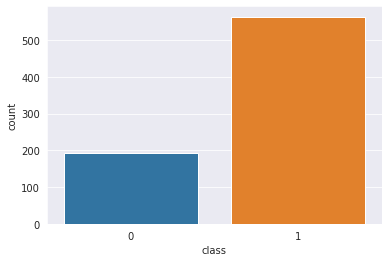

In [109]:
sns.countplot(data=df, x= 'class')

In [110]:
# Correlation between the features
df.corr()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,1.000000,-0.133605,0.026667,0.041938,-0.084606,0.085828,0.085226,-0.100831,-0.060464,-0.052865,-0.053242,-0.043118,-0.033177,-0.042941,-0.026528,-0.030966,-0.003872,-0.014963,-0.062943,-0.003883,-0.000844,0.013382,0.005422,0.001272,-0.041056,-0.027861,0.020222,0.183745,-0.027399,-0.040970,0.006928,0.056121,0.014227,0.011831,0.043525,-0.051898,-0.047075,-0.028496,-0.029086,-0.049264,...,0.029530,0.021700,0.023536,-0.039770,-0.019098,-0.021044,-0.034470,-0.062527,-0.038212,0.030588,0.008393,0.002324,-0.034003,-0.047758,-0.026516,0.021205,0.048809,0.031180,-0.009129,-0.017512,-0.027666,-0.015965,-0.049058,-0.017393,0.034967,0.028317,0.014667,0.000677,0.075756,0.053050,0.036897,0.016047,-0.023317,-0.045943,-0.041835,-0.053781,-0.058034,-0.057807,-0.055775,-0.111661
gender,-0.133605,1.000000,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,0.147604,0.103713,0.132220,0.103607,0.049110,0.045108,0.042358,0.021262,0.070699,0.042361,-0.052420,0.049660,-0.102439,-0.036851,0.020527,0.015253,-0.519415,-0.487495,0.097458,-0.069628,-0.162028,-0.147007,-0.181002,0.047676,-0.096363,0.067785,0.007415,-0.185652,0.058348,-0.130788,...,-0.004349,0.000188,-0.017461,0.087143,0.060780,0.052639,0.039608,0.030366,0.002321,-0.059287,-0.000746,0.003781,-0.046313,-0.032178,0.079000,0.037589,-0.053820,-0.028764,0.073180,0.009664,0.020030,0.007581,0.150320,0.029382,-0.065918,-0.040040,-0.040027,-0.055503,-0.240361,-0.273543,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828,0.182713
PPE,0.026667,0.010175,1.000000,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,-0.331009,-0.352693,-0.315749,-0.352547,-0.291379,-0.304997,-0.277071,-0.265907,-0.221549,-0.277074,0.343101,-0.322490,0.356035,0.198188,0.086053,0.112837,0.027940,0.009153,-0.021486,-0.004957,-0.052845,0.028994,0.008813,0.035277,0.276340,-0.313848,-0.385027,0.124969,-0.026172,0.027658,...,0.007413,0.012388,0.011800,-0.007339,-0.009811,-0.018240,-0.021187,-0.025908,-0.006875,0.016458,0.026299,0.028712,0.020360,-0.000354,0.013429,-0.004995,-0.050024,-0.067350,-0.089904,-0.106519,-0.069824,-0.056492,-0.031845,-0.026025,-0.129244,-0.054152,-0.038443,0.009439,0.087448,0.112430,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588,-0.072939
DFA,0.041938,0.099356,-0.094775,1.000000,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,0.201248,0.215512,0.229371,0.215378,0.285156,0.294626,0.301879,0.275767,0.208066,0.301883,-0.167906,0.142591,-0.301407,-0.289473,-0.304389,-0.31

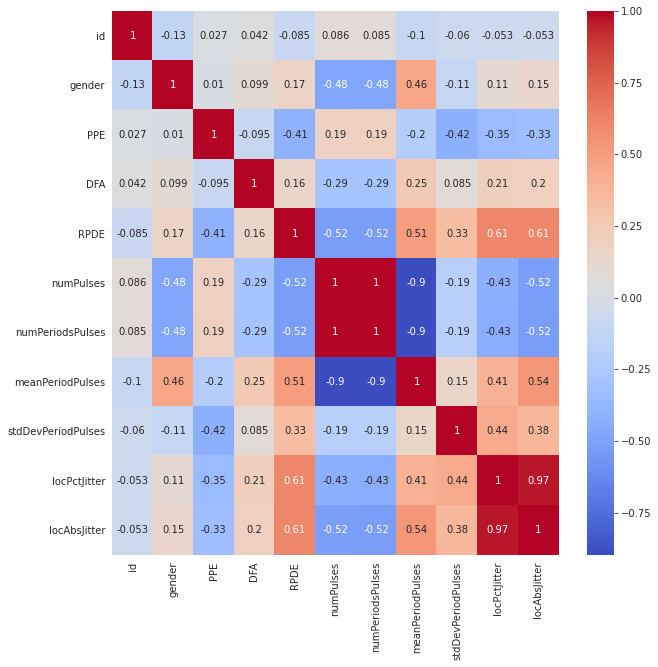

In [111]:
# Heatmap of the correlation between first 10 features
corr=df.iloc[:,0:11].corr()
top_features=corr.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_features].corr(),annot=True, cmap = 'coolwarm')

1) There are many features, so we cannot make heatmap of all features and visualize the corelations among them.

2) We can see from the above heatmap that some features are highly corelated and there will be more such features in the remaining dataset, so we need to remove one of the feature from a pair of two highly corelated features considering some threshold value obtained from the corelation data.

3) We will create a function which will return us the names of features whose corelation value is greater than the threshold value and then we can drop them.

In [112]:
# Function to return the highly related features 

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [113]:
# Finding corelated columns using the above function
correlation(df.iloc[:,0:755],0.8)

{'Ea2',
 'Ed2_10_coef',
 'Ed2_1_coef',
 'Ed2_2_coef',
 'Ed2_3_coef',
 'Ed2_4_coef',
 'Ed2_5_coef',
 'Ed2_6_coef',
 'Ed2_7_coef',
 'Ed2_8_coef',
 'Ed2_9_coef',
 'Ed_10_coef',
 'Ed_2_coef',
 'Ed_3_coef',
 'Ed_5_coef',
 'Ed_6_coef',
 'Ed_8_coef',
 'Ed_9_coef',
 'GNE_NSR_TKEO',
 'IMF_NSR_entropy',
 'VFER_entropy',
 'app_LT_TKEO_mean_10_coef',
 'app_LT_TKEO_mean_2_coef',
 'app_LT_TKEO_mean_3_coef',
 'app_LT_TKEO_mean_4_coef',
 'app_LT_TKEO_mean_5_coef',
 'app_LT_TKEO_mean_6_coef',
 'app_LT_TKEO_mean_7_coef',
 'app_LT_TKEO_mean_8_coef',
 'app_LT_TKEO_mean_9_coef',
 'app_LT_TKEO_std_10_coef',
 'app_LT_TKEO_std_1_coef',
 'app_LT_TKEO_std_2_coef',
 'app_LT_TKEO_std_3_coef',
 'app_LT_TKEO_std_4_coef',
 'app_LT_TKEO_std_5_coef',
 'app_LT_TKEO_std_6_coef',
 'app_LT_TKEO_std_7_coef',
 'app_LT_TKEO_std_8_coef',
 'app_LT_TKEO_std_9_coef',
 'app_LT_entropy_log_10_coef',
 'app_LT_entropy_log_1_coef',
 'app_LT_entropy_log_2_coef',
 'app_LT_entropy_log_3_coef',
 'app_LT_entropy_log_4_coef',
 'app_LT_entr

In [114]:
cols = ['Ea2',
 'Ed2_10_coef',
 'Ed2_1_coef',
 'Ed2_2_coef',
 'Ed2_3_coef',
 'Ed2_4_coef',
 'Ed2_5_coef',
 'Ed2_6_coef',
 'Ed2_7_coef',
 'Ed2_8_coef',
 'Ed2_9_coef',
 'Ed_10_coef',
 'Ed_2_coef',
 'Ed_3_coef',
 'Ed_5_coef',
 'Ed_6_coef',
 'Ed_8_coef',
 'Ed_9_coef',
 'GNE_NSR_TKEO',
 'IMF_NSR_entropy',
 'VFER_entropy',
 'app_LT_TKEO_mean_10_coef',
 'app_LT_TKEO_mean_2_coef',
 'app_LT_TKEO_mean_3_coef',
 'app_LT_TKEO_mean_4_coef',
 'app_LT_TKEO_mean_5_coef',
 'app_LT_TKEO_mean_6_coef',
 'app_LT_TKEO_mean_7_coef',
 'app_LT_TKEO_mean_8_coef',
 'app_LT_TKEO_mean_9_coef',
 'app_LT_TKEO_std_10_coef',
 'app_LT_TKEO_std_1_coef',
 'app_LT_TKEO_std_2_coef',
 'app_LT_TKEO_std_3_coef',
 'app_LT_TKEO_std_4_coef',
 'app_LT_TKEO_std_5_coef',
 'app_LT_TKEO_std_6_coef',
 'app_LT_TKEO_std_7_coef',
 'app_LT_TKEO_std_8_coef',
 'app_LT_TKEO_std_9_coef',
 'app_LT_entropy_log_10_coef',
 'app_LT_entropy_log_1_coef',
 'app_LT_entropy_log_2_coef',
 'app_LT_entropy_log_3_coef',
 'app_LT_entropy_log_4_coef',
 'app_LT_entropy_log_5_coef',
 'app_LT_entropy_log_6_coef',
 'app_LT_entropy_log_7_coef',
 'app_LT_entropy_log_8_coef',
 'app_LT_entropy_log_9_coef',
 'app_LT_entropy_shannon_10_coef',
 'app_LT_entropy_shannon_1_coef',
 'app_LT_entropy_shannon_2_coef',
 'app_LT_entropy_shannon_3_coef',
 'app_LT_entropy_shannon_4_coef',
 'app_LT_entropy_shannon_5_coef',
 'app_LT_entropy_shannon_6_coef',
 'app_LT_entropy_shannon_7_coef',
 'app_LT_entropy_shannon_8_coef',
 'app_LT_entropy_shannon_9_coef',
 'app_TKEO_std_10_coef',
 'app_TKEO_std_1_coef',
 'app_TKEO_std_2_coef',
 'app_TKEO_std_3_coef',
 'app_TKEO_std_4_coef',
 'app_TKEO_std_5_coef',
 'app_TKEO_std_6_coef',
 'app_TKEO_std_7_coef',
 'app_TKEO_std_8_coef',
 'app_TKEO_std_9_coef',
 'app_det_TKEO_mean_10_coef',
 'app_det_TKEO_mean_1_coef',
 'app_det_TKEO_mean_2_coef',
 'app_det_TKEO_mean_3_coef',
 'app_det_TKEO_mean_4_coef',
 'app_det_TKEO_mean_5_coef',
 'app_det_TKEO_mean_6_coef',
 'app_det_TKEO_mean_7_coef',
 'app_det_TKEO_mean_8_coef',
 'app_det_TKEO_mean_9_coef',
 'app_entropy_log_10_coef',
 'app_entropy_log_2_coef',
 'app_entropy_log_3_coef',
 'app_entropy_log_4_coef',
 'app_entropy_log_5_coef',
 'app_entropy_log_6_coef',
 'app_entropy_log_7_coef',
 'app_entropy_log_8_coef',
 'app_entropy_log_9_coef',
 'app_entropy_shannon_10_coef',
 'app_entropy_shannon_1_coef',
 'app_entropy_shannon_2_coef',
 'app_entropy_shannon_3_coef',
 'app_entropy_shannon_4_coef',
 'app_entropy_shannon_5_coef',
 'app_entropy_shannon_6_coef',
 'app_entropy_shannon_7_coef',
 'app_entropy_shannon_8_coef',
 'app_entropy_shannon_9_coef',
 'apq11Shimmer',
 'apq3Shimmer',
 'apq5Shimmer',
 'ddaShimmer',
 'ddpJitter',
 'det_LT_TKEO_mean_10_coef',
 'det_LT_TKEO_mean_1_coef',
 'det_LT_TKEO_mean_2_coef',
 'det_LT_TKEO_mean_3_coef',
 'det_LT_TKEO_mean_4_coef',
 'det_LT_TKEO_mean_5_coef',
 'det_LT_TKEO_mean_6_coef',
 'det_LT_TKEO_mean_7_coef',
 'det_LT_TKEO_mean_8_coef',
 'det_LT_TKEO_mean_9_coef',
 'det_LT_TKEO_std_10_coef',
 'det_LT_TKEO_std_1_coef',
 'det_LT_TKEO_std_2_coef',
 'det_LT_TKEO_std_3_coef',
 'det_LT_TKEO_std_4_coef',
 'det_LT_TKEO_std_5_coef',
 'det_LT_TKEO_std_6_coef',
 'det_LT_TKEO_std_7_coef',
 'det_LT_TKEO_std_8_coef',
 'det_LT_TKEO_std_9_coef',
 'det_LT_entropy_log_10_coef',
 'det_LT_entropy_log_1_coef',
 'det_LT_entropy_log_2_coef',
 'det_LT_entropy_log_3_coef',
 'det_LT_entropy_log_4_coef',
 'det_LT_entropy_log_5_coef',
 'det_LT_entropy_log_6_coef',
 'det_LT_entropy_log_7_coef',
 'det_LT_entropy_log_8_coef',
 'det_LT_entropy_log_9_coef',
 'det_LT_entropy_shannon_10_coef',
 'det_LT_entropy_shannon_5_coef',
 'det_LT_entropy_shannon_6_coef',
 'det_LT_entropy_shannon_7_coef',
 'det_LT_entropy_shannon_8_coef',
 'det_LT_entropy_shannon_9_coef',
 'det_TKEO_mean_10_coef',
 'det_TKEO_mean_1_coef',
 'det_TKEO_mean_2_coef',
 'det_TKEO_mean_3_coef',
 'det_TKEO_mean_4_coef',
 'det_TKEO_mean_5_coef',
 'det_TKEO_mean_6_coef',
 'det_TKEO_mean_7_coef',
 'det_TKEO_mean_8_coef',
 'det_TKEO_mean_9_coef',
 'det_TKEO_std_10_coef',
 'det_TKEO_std_1_coef',
 'det_TKEO_std_2_coef',
 'det_TKEO_std_3_coef',
 'det_TKEO_std_4_coef',
 'det_TKEO_std_5_coef',
 'det_TKEO_std_6_coef',
 'det_TKEO_std_7_coef',
 'det_TKEO_std_8_coef',
 'det_TKEO_std_9_coef',
 'det_entropy_log_10_coef',
 'det_entropy_log_2_coef',
 'det_entropy_log_3_coef',
 'det_entropy_log_4_coef',
 'det_entropy_log_5_coef',
 'det_entropy_log_6_coef',
 'det_entropy_log_7_coef',
 'det_entropy_log_8_coef',
 'det_entropy_log_9_coef',
 'det_entropy_shannon_10_coef',
 'det_entropy_shannon_1_coef',
 'det_entropy_shannon_2_coef',
 'det_entropy_shannon_3_coef',
 'det_entropy_shannon_5_coef',
 'det_entropy_shannon_8_coef',
 'locAbsJitter',
 'locDbShimmer',
 'maxIntensity',
 'meanHarmToNoiseHarmonicity',
 'meanIntensity',
 'meanNoiseToHarmHarmonicity',
 'meanPeriodPulses',
 'mean_0th_delta',
 'numPeriodsPulses',
 'ppq5Jitter',
 'rapJitter',
 'std_0th_delta',
 'std_10th_delta',
 'std_10th_delta_delta',
 'std_11th_delta_delta',
 'std_12th_delta_delta',
 'std_1st_delta',
 'std_1st_delta_delta',
 'std_2nd_delta_delta',
 'std_3rd_delta',
 'std_3rd_delta_delta',
 'std_4th_delta',
 'std_4th_delta_delta',
 'std_5th_delta',
 'std_5th_delta_delta',
 'std_6th_delta',
 'std_6th_delta_delta',
 'std_7th_delta',
 'std_7th_delta_delta',
 'std_8th_delta',
 'std_8th_delta_delta',
 'std_9th_delta_delta',
 'std_MFCC_0th_coef',
 'std_delta_delta_0th',
 'std_delta_delta_log_energy',
 'std_delta_log_energy',
 'tqwt_TKEO_mean_dec_1',
 'tqwt_TKEO_mean_dec_10',
 'tqwt_TKEO_mean_dec_11',
 'tqwt_TKEO_mean_dec_12',
 'tqwt_TKEO_mean_dec_13',
 'tqwt_TKEO_mean_dec_14',
 'tqwt_TKEO_mean_dec_15',
 'tqwt_TKEO_mean_dec_16',
 'tqwt_TKEO_mean_dec_2',
 'tqwt_TKEO_mean_dec_27',
 'tqwt_TKEO_mean_dec_28',
 'tqwt_TKEO_mean_dec_29',
 'tqwt_TKEO_mean_dec_3',
 'tqwt_TKEO_mean_dec_30',
 'tqwt_TKEO_mean_dec_32',
 'tqwt_TKEO_mean_dec_33',
 'tqwt_TKEO_mean_dec_34',
 'tqwt_TKEO_mean_dec_35',
 'tqwt_TKEO_mean_dec_4',
 'tqwt_TKEO_mean_dec_5',
 'tqwt_TKEO_mean_dec_6',
 'tqwt_TKEO_mean_dec_7',
 'tqwt_TKEO_mean_dec_8',
 'tqwt_TKEO_mean_dec_9',
 'tqwt_TKEO_std_dec_1',
 'tqwt_TKEO_std_dec_10',
 'tqwt_TKEO_std_dec_11',
 'tqwt_TKEO_std_dec_12',
 'tqwt_TKEO_std_dec_13',
 'tqwt_TKEO_std_dec_14',
 'tqwt_TKEO_std_dec_15',
 'tqwt_TKEO_std_dec_16',
 'tqwt_TKEO_std_dec_17',
 'tqwt_TKEO_std_dec_18',
 'tqwt_TKEO_std_dec_19',
 'tqwt_TKEO_std_dec_2',
 'tqwt_TKEO_std_dec_20',
 'tqwt_TKEO_std_dec_21',
 'tqwt_TKEO_std_dec_22',
 'tqwt_TKEO_std_dec_23',
 'tqwt_TKEO_std_dec_24',
 'tqwt_TKEO_std_dec_25',
 'tqwt_TKEO_std_dec_26',
 'tqwt_TKEO_std_dec_27',
 'tqwt_TKEO_std_dec_28',
 'tqwt_TKEO_std_dec_29',
 'tqwt_TKEO_std_dec_3',
 'tqwt_TKEO_std_dec_30',
 'tqwt_TKEO_std_dec_31',
 'tqwt_TKEO_std_dec_32',
 'tqwt_TKEO_std_dec_33',
 'tqwt_TKEO_std_dec_34',
 'tqwt_TKEO_std_dec_35',
 'tqwt_TKEO_std_dec_36',
 'tqwt_TKEO_std_dec_4',
 'tqwt_TKEO_std_dec_5',
 'tqwt_TKEO_std_dec_6',
 'tqwt_TKEO_std_dec_7',
 'tqwt_TKEO_std_dec_8',
 'tqwt_TKEO_std_dec_9',
 'tqwt_energy_dec_10',
 'tqwt_energy_dec_11',
 'tqwt_energy_dec_13',
 'tqwt_energy_dec_14',
 'tqwt_energy_dec_15',
 'tqwt_energy_dec_16',
 'tqwt_energy_dec_2',
 'tqwt_energy_dec_3',
 'tqwt_energy_dec_30',
 'tqwt_energy_dec_33',
 'tqwt_energy_dec_34',
 'tqwt_energy_dec_36',
 'tqwt_energy_dec_4',
 'tqwt_energy_dec_6',
 'tqwt_energy_dec_7',
 'tqwt_energy_dec_8',
 'tqwt_entropy_log_dec_10',
 'tqwt_entropy_log_dec_11',
 'tqwt_entropy_log_dec_12',
 'tqwt_entropy_log_dec_13',
 'tqwt_entropy_log_dec_14',
 'tqwt_entropy_log_dec_15',
 'tqwt_entropy_log_dec_16',
 'tqwt_entropy_log_dec_17',
 'tqwt_entropy_log_dec_18',
 'tqwt_entropy_log_dec_19',
 'tqwt_entropy_log_dec_2',
 'tqwt_entropy_log_dec_20',
 'tqwt_entropy_log_dec_21',
 'tqwt_entropy_log_dec_22',
 'tqwt_entropy_log_dec_28',
 'tqwt_entropy_log_dec_29',
 'tqwt_entropy_log_dec_3',
 'tqwt_entropy_log_dec_31',
 'tqwt_entropy_log_dec_32',
 'tqwt_entropy_log_dec_33',
 'tqwt_entropy_log_dec_34',
 'tqwt_entropy_log_dec_35',
 'tqwt_entropy_log_dec_36',
 'tqwt_entropy_log_dec_4',
 'tqwt_entropy_log_dec_5',
 'tqwt_entropy_log_dec_6',
 'tqwt_entropy_log_dec_7',
 'tqwt_entropy_log_dec_8',
 'tqwt_entropy_log_dec_9',
 'tqwt_entropy_shannon_dec_10',
 'tqwt_entropy_shannon_dec_11',
 'tqwt_entropy_shannon_dec_12',
 'tqwt_entropy_shannon_dec_13',
 'tqwt_entropy_shannon_dec_14',
 'tqwt_entropy_shannon_dec_15',
 'tqwt_entropy_shannon_dec_16',
 'tqwt_entropy_shannon_dec_17',
 'tqwt_entropy_shannon_dec_19',
 'tqwt_entropy_shannon_dec_2',
 'tqwt_entropy_shannon_dec_3',
 'tqwt_entropy_shannon_dec_33',
 'tqwt_entropy_shannon_dec_35',
 'tqwt_entropy_shannon_dec_4',
 'tqwt_entropy_shannon_dec_5',
 'tqwt_entropy_shannon_dec_6',
 'tqwt_entropy_shannon_dec_7',
 'tqwt_entropy_shannon_dec_8',
 'tqwt_entropy_shannon_dec_9',
 'tqwt_kurtosisValue_dec_10',
 'tqwt_kurtosisValue_dec_14',
 'tqwt_kurtosisValue_dec_15',
 'tqwt_kurtosisValue_dec_17',
 'tqwt_kurtosisValue_dec_18',
 'tqwt_kurtosisValue_dec_19',
 'tqwt_kurtosisValue_dec_2',
 'tqwt_kurtosisValue_dec_29',
 'tqwt_kurtosisValue_dec_3',
 'tqwt_kurtosisValue_dec_31',
 'tqwt_kurtosisValue_dec_32',
 'tqwt_kurtosisValue_dec_33',
 'tqwt_kurtosisValue_dec_34',
 'tqwt_kurtosisValue_dec_35',
 'tqwt_kurtosisValue_dec_36',
 'tqwt_kurtosisValue_dec_4',
 'tqwt_kurtosisValue_dec_5',
 'tqwt_kurtosisValue_dec_6',
 'tqwt_kurtosisValue_dec_9',
 'tqwt_maxValue_dec_1',
 'tqwt_maxValue_dec_10',
 'tqwt_maxValue_dec_11',
 'tqwt_maxValue_dec_12',
 'tqwt_maxValue_dec_13',
 'tqwt_maxValue_dec_14',
 'tqwt_maxValue_dec_15',
 'tqwt_maxValue_dec_16',
 'tqwt_maxValue_dec_17',
 'tqwt_maxValue_dec_18',
 'tqwt_maxValue_dec_19',
 'tqwt_maxValue_dec_2',
 'tqwt_maxValue_dec_20',
 'tqwt_maxValue_dec_21',
 'tqwt_maxValue_dec_22',
 'tqwt_maxValue_dec_23',
 'tqwt_maxValue_dec_24',
 'tqwt_maxValue_dec_25',
 'tqwt_maxValue_dec_26',
 'tqwt_maxValue_dec_27',
 'tqwt_maxValue_dec_28',
 'tqwt_maxValue_dec_29',
 'tqwt_maxValue_dec_3',
 'tqwt_maxValue_dec_30',
 'tqwt_maxValue_dec_31',
 'tqwt_maxValue_dec_32',
 'tqwt_maxValue_dec_33',
 'tqwt_maxValue_dec_34',
 'tqwt_maxValue_dec_35',
 'tqwt_maxValue_dec_36',
 'tqwt_maxValue_dec_4',
 'tqwt_maxValue_dec_5',
 'tqwt_maxValue_dec_6',
 'tqwt_maxValue_dec_7',
 'tqwt_maxValue_dec_8',
 'tqwt_maxValue_dec_9',
 'tqwt_meanValue_dec_33',
 'tqwt_meanValue_dec_36',
 'tqwt_minValue_dec_10',
 'tqwt_minValue_dec_11',
 'tqwt_minValue_dec_12',
 'tqwt_minValue_dec_13',
 'tqwt_minValue_dec_14',
 'tqwt_minValue_dec_15',
 'tqwt_minValue_dec_16',
 'tqwt_minValue_dec_17',
 'tqwt_minValue_dec_18',
 'tqwt_minValue_dec_19',
 'tqwt_minValue_dec_2',
 'tqwt_minValue_dec_20',
 'tqwt_minValue_dec_21',
 'tqwt_minValue_dec_22',
 'tqwt_minValue_dec_23',
 'tqwt_minValue_dec_24',
 'tqwt_minValue_dec_25',
 'tqwt_minValue_dec_26',
 'tqwt_minValue_dec_27',
 'tqwt_minValue_dec_28',
 'tqwt_minValue_dec_29',
 'tqwt_minValue_dec_3',
 'tqwt_minValue_dec_30',
 'tqwt_minValue_dec_31',
 'tqwt_minValue_dec_32',
 'tqwt_minValue_dec_33',
 'tqwt_minValue_dec_34',
 'tqwt_minValue_dec_35',
 'tqwt_minValue_dec_36',
 'tqwt_minValue_dec_4',
 'tqwt_minValue_dec_5',
 'tqwt_minValue_dec_6',
 'tqwt_minValue_dec_7',
 'tqwt_minValue_dec_8',
 'tqwt_minValue_dec_9',
 'tqwt_skewnessValue_dec_10',
 'tqwt_skewnessValue_dec_2',
 'tqwt_skewnessValue_dec_29',
 'tqwt_skewnessValue_dec_32',
 'tqwt_skewnessValue_dec_33',
 'tqwt_skewnessValue_dec_34',
 'tqwt_skewnessValue_dec_35',
 'tqwt_skewnessValue_dec_36',
 'tqwt_skewnessValue_dec_4',
 'tqwt_stdValue_dec_1',
 'tqwt_stdValue_dec_10',
 'tqwt_stdValue_dec_11',
 'tqwt_stdValue_dec_12',
 'tqwt_stdValue_dec_13',
 'tqwt_stdValue_dec_14',
 'tqwt_stdValue_dec_15',
 'tqwt_stdValue_dec_16',
 'tqwt_stdValue_dec_17',
 'tqwt_stdValue_dec_18',
 'tqwt_stdValue_dec_19',
 'tqwt_stdValue_dec_2',
 'tqwt_stdValue_dec_20',
 'tqwt_stdValue_dec_21',
 'tqwt_stdValue_dec_22',
 'tqwt_stdValue_dec_23',
 'tqwt_stdValue_dec_24',
 'tqwt_stdValue_dec_25',
 'tqwt_stdValue_dec_26',
 'tqwt_stdValue_dec_27',
 'tqwt_stdValue_dec_28',
 'tqwt_stdValue_dec_29',
 'tqwt_stdValue_dec_3',
 'tqwt_stdValue_dec_30',
 'tqwt_stdValue_dec_31',
 'tqwt_stdValue_dec_32',
 'tqwt_stdValue_dec_33',
 'tqwt_stdValue_dec_34',
 'tqwt_stdValue_dec_35',
 'tqwt_stdValue_dec_36',
 'tqwt_stdValue_dec_4',
 'tqwt_stdValue_dec_5',
 'tqwt_stdValue_dec_6',
 'tqwt_stdValue_dec_7',
 'tqwt_stdValue_dec_8',
 'tqwt_stdValue_dec_9', 'id']


In [115]:
# Number of corelated columns
len(cols)

473

In [116]:
#Dropping the corelated columns
df.drop(df[cols],axis=1, inplace=True)

In [117]:
 df.shape

(756, 282)

After dropping the highly corelated features , we are left with 282 features, which will be used in further model building.

In [118]:
df.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,...,tqwt_skewnessValue_dec_8,tqwt_skewnessValue_dec_9,tqwt_skewnessValue_dec_11,tqwt_skewnessValue_dec_12,tqwt_skewnessValue_dec_13,tqwt_skewnessValue_dec_14,tqwt_skewnessValue_dec_15,tqwt_skewnessValue_dec_16,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_18,tqwt_skewnessValue_dec_19,tqwt_skewnessValue_dec_20,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_23,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_26,tqwt_skewnessValue_dec_27,tqwt_skewnessValue_dec_28,tqwt_skewnessValue_dec_30,tqwt_skewnessValue_dec_31,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30,class
0,1,0.85247,0.71826,0.57227,240,0.000087,0.00218,0.05883,0.970805,69.997496,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,1200445.612,3.0152,0.000463,0.000260,209.6062,455.9654,1.2825,1.3305,51.6843,5.7784,23.2610,0.26850,5.8573,9.1817,11.4283,8.4781,...,-1.110000e-17,-0.000829,-0.000362,1.010000e-15,-5.850000e-17,-0.003143,0.007433,1.510000e-17,2.210000e-17,-9.370000e-18,0.000734,-4.330000e-18,-4.470000e-17,-1.390000e-17,-3.500000e-17,-4.290000e-19,-9.660000e-18,-1.660000e-17,0.000115,-0.102900,7.070000e-17,-0.086911,66.5007,8.0024,6.9635,4.6068,7.7218,2.7224,4.2077,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,3.8686,1
1,1,0.76686,0.69481,0.53966,234,0.000073,0.00195,0.05516,0.984322,67.415903,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,1298455.445,3.0600,0.000615,0.000295,243.0816,379.8429,1.3063,1.3177,24.0230,6.7916,21.8851,0.26839,6.2366,9.6074,12.1387,8.5008,...,3.350000e-17,-0.033633,0.178080,-3.680000e-15,-2.350000e-17,0.006114,-0.000092,-7.090000e-18,-3.910000e-18,8.750000e-18,0.000330,-9.330000e-19,-7.020000e-20,-1.010000e-17,1.520000e-17,-5.590000e-18,8.090000e-18,-6.280000e-18,0.000098,-0.005679,3.630000e-16,0.482840,8643.9860,116.5331,20.2332,13.6965,60.8974,6.2958,4.3794,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,23.5155,1
2,1,0.85083,0.67604,0.58982,232,0.000060,0.00176,0.09902,0.974846,62.661706,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,1272869.841,3.0309,0.000360,0.000266,238.5976,386.4739,1.2614,1.3078,60.0458,11.3376,41.7310,0.23034,4.8081,9.0512,11.3956,7.6362,...,7.430000e-17,-0.016802,-0.006751,2.320000e-16,-7.030000e-17,0.006447,-0.005623,-1.960000e-16,-2.070000e-17,-1.000000e-17,0.004345,-8.020000e-18,1.200000e-16,4.890000e-17,3.920000e-17,2.460000e-18,1.120000e-16,-1.140000e-17,0.000402,-0.003824,-3.900000e-17,0.301650,29.2717,6.8890,6.1357,4.0864,6.9828,3.4411,4.2212,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,9.4959,1
3,0,0.41121,0.79672,0.59257,178,0.000183,0.00419,0.05451,0.968343,76.306989,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,1932289.206,3.0293,0.000196,0.000194,79.0921,161.1054,1.2369,1.2986,83.6201,5.0784,35.8179,0.23529,4.2629,9.8453,13.7399

### Data Preprocessing

In [119]:
# Separating the target variable from features
X=df.iloc[:,:-1]
y=df['class']

In [120]:
X.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,...,tqwt_skewnessValue_dec_7,tqwt_skewnessValue_dec_8,tqwt_skewnessValue_dec_9,tqwt_skewnessValue_dec_11,tqwt_skewnessValue_dec_12,tqwt_skewnessValue_dec_13,tqwt_skewnessValue_dec_14,tqwt_skewnessValue_dec_15,tqwt_skewnessValue_dec_16,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_18,tqwt_skewnessValue_dec_19,tqwt_skewnessValue_dec_20,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_23,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_26,tqwt_skewnessValue_dec_27,tqwt_skewnessValue_dec_28,tqwt_skewnessValue_dec_30,tqwt_skewnessValue_dec_31,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30
0,1,0.85247,0.71826,0.57227,240,0.000087,0.00218,0.05883,0.970805,69.997496,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,1200445.612,3.0152,0.000463,0.000260,209.6062,455.9654,1.2825,1.3305,51.6843,5.7784,23.2610,0.26850,5.8573,9.1817,11.4283,8.4781,...,-0.005383,-1.110000e-17,-0.000829,-0.000362,1.010000e-15,-5.850000e-17,-0.003143,0.007433,1.510000e-17,2.210000e-17,-9.370000e-18,0.000734,-4.330000e-18,-4.470000e-17,-1.390000e-17,-3.500000e-17,-4.290000e-19,-9.660000e-18,-1.660000e-17,0.000115,-0.102900,7.070000e-17,-0.086911,66.5007,8.0024,6.9635,4.6068,7.7218,2.7224,4.2077,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,3.8686
1,1,0.76686,0.69481,0.53966,234,0.000073,0.00195,0.05516,0.984322,67.415903,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,1298455.445,3.0600,0.000615,0.000295,243.0816,379.8429,1.3063,1.3177,24.0230,6.7916,21.8851,0.26839,6.2366,9.6074,12.1387,8.5008,...,-0.101740,3.350000e-17,-0.033633,0.178080,-3.680000e-15,-2.350000e-17,0.006114,-0.000092,-7.090000e-18,-3.910000e-18,8.750000e-18,0.000330,-9.330000e-19,-7.020000e-20,-1.010000e-17,1.520000e-17,-5.590000e-18,8.090000e-18,-6.280000e-18,0.000098,-0.005679,3.630000e-16,0.482840,8643.9860,116.5331,20.2332,13.6965,60.8974,6.2958,4.3794,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,23.5155
2,1,0.85083,0.67604,0.58982,232,0.000060,0.00176,0.09902,0.974846,62.661706,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,1272869.841,3.0309,0.000360,0.000266,238.5976,386.4739,1.2614,1.3078,60.0458,11.3376,41.7310,0.23034,4.8081,9.0512,11.3956,7.6362,...,-0.040808,7.430000e-17,-0.016802,-0.006751,2.320000e-16,-7.030000e-17,0.006447,-0.005623,-1.960000e-16,-2.070000e-17,-1.000000e-17,0.004345,-8.020000e-18,1.200000e-16,4.890000e-17,3.920000e-17,2.460000e-18,1.120000e-16,-1.140000e-17,0.000402,-0.003824,-3.900000e-17,0.301650,29.2717,6.8890,6.1357,4.0864,6.9828,3.4411,4.2212,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,9.4959
3,0,0.41121,0.79672,0.59257,178,0.000183,0.00419,0.05451,0.968343,76.306989,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,1932289.206,3.0293,0.000196,0.000194,79.0921,161.1054,1.2369,1.2986,83.6201,5

In [121]:
# #splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state = 0)

In [122]:
# Shape of training data
X_train.shape

(642, 281)

In [123]:
# Shape of Testing data
X_test.shape

(114, 281)

In [124]:
print("counts of label '1': {}".format(sum(y_train == 1)))
print("counts of label '0': {} \n".format(sum(y_train == 0)))

counts of label '1': 477
counts of label '0': 165 



1) We can see that the data is unbalanced having only 25% of the minority class.

2) In order to balance our training data , we will use SMOTE Oversampling technique to create synthetic new samples of our minority class.

In [125]:
# Installing imblearn library to import SMOTE for oversampling

!pip install imblearn

In [126]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 0)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [127]:
print("counts of label '1': {}".format(sum(y_train == 1)))
print("counts of label '0': {} \n".format(sum(y_train == 0)))

counts of label '1': 477
counts of label '0': 477 



We now have equal number of positives and negatives.

### Model Building

In [128]:
# Creating a Random Forest Classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [129]:
y_pred = classifier.predict(X_test)

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : {} %'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))



[[19  8]
 [ 5 82]]
Accuracy : 88.59649122807018 %
              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.91      0.94      0.93        87

    accuracy                           0.89       114
   macro avg       0.85      0.82      0.84       114
weighted avg       0.88      0.89      0.88       114



1) We have got an accuracy of 88.59 % after applying the Random Forest Model on the training dataset with 281 features.

2) We need to see if we can improve the accuracy by selecting the top features out of 281 who have contriuted to the model more.

In [131]:
# Top 60 features who have contributed more to the model building
rank =pd.Series(classifier.feature_importances_,index=X.columns)
rank.nlargest(60)

std_9th_delta                    0.026044
tqwt_energy_dec_12               0.025525
mean_MFCC_2nd_coef               0.023767
minIntensity                     0.021814
tqwt_TKEO_mean_dec_17            0.020639
tqwt_TKEO_mean_dec_36            0.016934
tqwt_kurtosisValue_dec_27        0.015586
tqwt_kurtosisValue_dec_26        0.015433
std_11th_delta                   0.014365
tqwt_entropy_shannon_dec_34      0.012922
f1                               0.012616
tqwt_energy_dec_26               0.012013
tqwt_entropy_log_dec_26          0.011819
locPctJitter                     0.011488
std_Log_energy                   0.011349
tqwt_energy_dec_5                0.011349
tqwt_entropy_log_dec_27          0.011268
gender                           0.010417
mean_MFCC_6th_coef               0.010069
tqwt_entropy_shannon_dec_36      0.009956
tqwt_energy_dec_17               0.009895
tqwt_kurtosisValue_dec_20        0.009805
tqwt_entropy_shannon_dec_18      0.008845
mean_MFCC_3rd_coef               0

In [132]:
cols = rank.nlargest(60).index
cols


Index(['std_9th_delta', 'tqwt_energy_dec_12', 'mean_MFCC_2nd_coef',
       'minIntensity', 'tqwt_TKEO_mean_dec_17', 'tqwt_TKEO_mean_dec_36',
       'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_26',
       'std_11th_delta', 'tqwt_entropy_shannon_dec_34', 'f1',
       'tqwt_energy_dec_26', 'tqwt_entropy_log_dec_26', 'locPctJitter',
       'std_Log_energy', 'tqwt_energy_dec_5', 'tqwt_entropy_log_dec_27',
       'gender', 'mean_MFCC_6th_coef', 'tqwt_entropy_shannon_dec_36',
       'tqwt_energy_dec_17', 'tqwt_kurtosisValue_dec_20',
       'tqwt_entropy_shannon_dec_18', 'mean_MFCC_3rd_coef', 'numPulses',
       'tqwt_kurtosisValue_dec_28', 'VFER_mean', 'app_LT_TKEO_mean_1_coef',
       'tqwt_energy_dec_25', 'std_MFCC_6th_coef', 'std_12th_delta',
       'tqwt_TKEO_mean_dec_19', 'tqwt_skewnessValue_dec_25', 'IMF_NSR_TKEO',
       'tqwt_energy_dec_9', 'tqwt_entropy_shannon_dec_32',
       'tqwt_TKEO_mean_dec_18', 'tqwt_kurtosisValue_dec_25', 'DFA',
       'tqwt_medianValue_dec_36', 'det

In [133]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.0043
sfm = SelectFromModel(classifier, threshold = 0.0043)

In [134]:
# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [135]:
sfm.get_support(indices=True)

array([  0,   2,   4,   6,   9,  10,  11,  26,  32,  36,  40,  41,  44,
        51,  78,  82,  84,  91,  92,  93,  94, 106, 107, 109, 111, 112,
       113, 114, 122, 123, 124, 131, 137, 143, 144, 145, 146, 147, 150,
       151, 152, 154, 155, 156, 158, 165, 187, 201, 246, 249, 258, 259,
       270, 271, 272, 274, 276, 277, 278, 279])

In [136]:
# Transform the data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

We will now use this 60 features to build our model and see if accuracy improves or not.

In [137]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(random_state=0)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [138]:
# Apply The Classifier To The Test Data
y_pred = clf_important.predict(X_important_test)

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : {} %'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

[[21  6]
 [ 5 82]]
Accuracy : 90.35087719298247 %
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.93      0.94      0.94        87

    accuracy                           0.90       114
   macro avg       0.87      0.86      0.86       114
weighted avg       0.90      0.90      0.90       114



We can see that the accuracy has been increased to 90.35% after using the top 60 features instead of 281.

### Comparison of Different Models

In [140]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_important_train = sc.fit_transform(X_important_train)
X_important_test =  sc.transform(X_important_test)

LR: 86.372807 (4.149856)
KNN: 88.080044 (7.974250)
SVM: 92.140351 (3.263869)
NB: 80.588816 (5.702309)
RF: 95.081140 (3.170890)


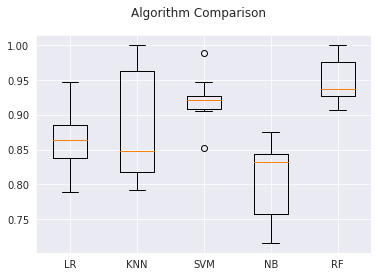

In [141]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))


results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_important_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
	print(msg)
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####  Conclusion
We can see from the above validation scores that Random Forest has the best accuracy score of 95.08% among all the algorithms and hence we can deduce that we can apply random forest model to classify Parkinson's Disease patients with high accuracy.